# Úkoly

1. Vytvořte pole 3x4 typu `bool` se všemi prvky `True`.
2. Vytvořte matici 5x5 kde jediné nenulová prvky jsou [1, 2, 3, 4] pod hlavní diagonálou (nápověda - podívejte se na nápovědu funkce `diagflat`).
```
0 0 0 0 0
1 0 0 0 0
0 2 0 0 0
0 0 3 0 0 
0 0 0 4 0
```

In [1]:
import numpy as np

#1
true_pole = np.full(shape=(3, 4), fill_value=True)
print(true_pole)

#2
matrix = np.diagflat([1,2,3,4], -1)
print(matrix)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


3. Z pole 8x8 samých nul vyvořte pomocí řezů co nejelegantnějším způsobem 8x8 matici, která vypadá jako šachovnice.
```
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
```
4. Pomocí `np.random.randint` vytvořte vektor dvouciferných kladných celých čísel. Poté pomocí indexu typu masky nahraďte liché hodnoty jejich opačnou hodnotou. Např. [11, 20, 42, 33] -> [-11, 20, 42, -33].

In [2]:
#3
chessboard = np.zeros((8, 8))
for i in range(0, 8): chessboard[i, (i+1)%2::2] = 1
print(chessboard)

#4
count = 10
arr = np.array(np.random.randint(10, 100, count))
arr[arr % 2 == 1] *= -1
print(arr)

[[0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]]
[-51 -85  32  66  94  10  14  86 -47 -93]


5. Ověřte empiricky na náhodné matici, že platí $(AB)^T = B^T A^T$


In [3]:
sizes = np.random.randint(1, 10, 3)
min = -10
max = +10
A = np.matrix(np.random.randint(min, max+1, (sizes[0], sizes[1])))
B = np.matrix(np.random.randint(min, max+1, (sizes[1], sizes[2])))

print(f"A =\n{A},\nB =\n{B}")
ABt = (A * B).transpose()
BtAt = B.transpose() * A.transpose()
print(f"ABt =\n{ABt}\nBtAt =\n{BtAt}")
print("Verdict:", "they're equal" if ABt.all() == BtAt.all() else "they're different")

A =
[[ 3]
 [ 9]
 [ 3]
 [ 1]
 [-9]
 [-7]
 [-5]
 [-6]
 [ 9]],
B =
[[2]]
ABt =
[[  6  18   6   2 -18 -14 -10 -12  18]]
BtAt =
[[  6  18   6   2 -18 -14 -10 -12  18]]
Verdict: they're equal


6. Pro náhodné 1D vektory $u, v$ vypočítejte dyadický součin $uv$ $$(uv)_{ij} = u_iv_j$$ pomocí `newaxis`. Zkontrolujte s `np.outer(u, v)`

In [4]:
length = np.random.randint(1, 10, 2)
min = -10
max = +10
u = np.array(np.random.randint(min, max+1, length[0]))
v = np.array(np.random.randint(min, max+1, length[1]))

print(f"{u}\n{v}")
uTv = u[:, np.newaxis] * v
np_outer = np.outer(u, v)
print(f"newaxis:\n{uTv}\nnp.outer:\n{np_outer}")
print("Verdict:", "they're equal" if uTv.all() == np_outer.all() else "they're different")

[-1  0  9 -4  1]
[  9 -10   0  -1]
newaxis:
[[ -9  10   0   1]
 [  0   0   0   0]
 [ 81 -90   0  -9]
 [-36  40   0   4]
 [  9 -10   0  -1]]
np.outer:
[[ -9  10   0   1]
 [  0   0   0   0]
 [ 81 -90   0  -9]
 [-36  40   0   4]
 [  9 -10   0  -1]]
Verdict: they're equal


7. Vytvořte šachovnicovou matici pomocí `tile`.

In [5]:
print(np.matrix(np.tile([[0,1],[1,0]], [4,4])))

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


# Domácí úkoly
## 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [8]:
def integer_spiral_numpy(n):
    A = np.zeros((n+1, n+1)) #needs +1 else it doesn't write last column, kinda stupid but it works
    
    if n > 0:
        mid = n//2 + 1
        A[mid, mid] = 1
        for i in range(1, mid):
            nums = ((2*i - 1)**2 + 1, (2*i - 1)**2 + 2*i, (2*i)**2 + 1)
            A[mid-i, mid+i-1:mid-i:-1] = np.arange(nums[0], nums[1])
            A[mid-i:mid+i:1, mid-i] = np.arange(nums[1], nums[2])
            if i*2 < n:
                nums = ((2*i)**2 + 1, (2*i)**2 + 2*i + 1, (2*i + 1)**2 + 1)
                A[mid+i, mid-i:mid+i:1] = np.arange(nums[0], nums[1])
                A[mid+i:mid-i-1:-1, mid+i] = np.arange(nums[1], nums[2])
    return A[1:, 1:]

In [9]:
#set size
n = 7
A = integer_spiral(n)
B = integer_spiral_numpy(n)
print(f"{A}\n{B}")
print(f"Verdict:", "they're equal" if A.all() == B.all() else "they're different")

[[31. 30. 29. 28. 27. 26. 49.]
 [32. 13. 12. 11. 10. 25. 48.]
 [33. 14.  3.  2.  9. 24. 47.]
 [34. 15.  4.  1.  8. 23. 46.]
 [35. 16.  5.  6.  7. 22. 45.]
 [36. 17. 18. 19. 20. 21. 44.]
 [37. 38. 39. 40. 41. 42. 43.]]
[[31. 30. 29. 28. 27. 26. 49.]
 [32. 13. 12. 11. 10. 25. 48.]
 [33. 14.  3.  2.  9. 24. 47.]
 [34. 15.  4.  1.  8. 23. 46.]
 [35. 16.  5.  6.  7. 22. 45.]
 [36. 17. 18. 19. 20. 21. 44.]
 [37. 38. 39. 40. 41. 42. 43.]]
Verdict: they're equal


In [10]:
%%timeit
A = integer_spiral(n)

61 µs ± 180 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [11]:
%%timeit
B = integer_spiral_numpy(n)

29.9 µs ± 2.9 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.

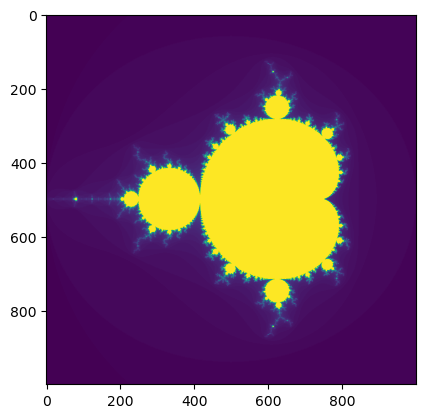

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [12]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    matrix_real, matrix_complex = np.meshgrid(np.linspace(x_min, x_max, n), np.linspace(y_max*1j, y_min*1j, n))
    C = matrix_real + matrix_complex
    Z = np.zeros(shape=(n,n))
    div = np.full(shape=(n,n), fill_value=k, dtype=int)

    for i in range(k):
        Z = np.power(Z, 2) + C
        mask = np.abs(Z) > 2
        div[mask] = i
        Z[mask] = 0
        C[mask] = 0
    
    return div

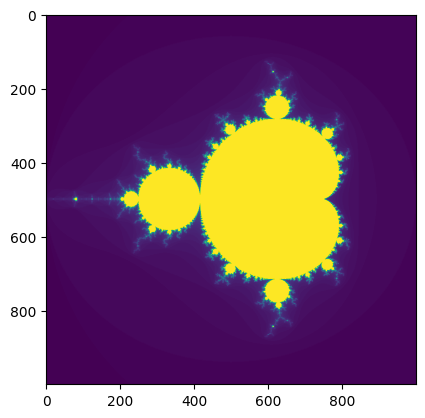

In [13]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
- Zkuste si číselnou spirálu vykreslit, a vykreslit různé funkce, můžete dostat zajímavé obrázky.
- Zkuste místo posloupnosti 1,2,... udělat spirálu pouze z prvočísel.
- Zkuste vykresilt další typy fraktálů, např. Julia set viz [Wikipedia](https://en.wikipedia.org/wiki/Julia_set).

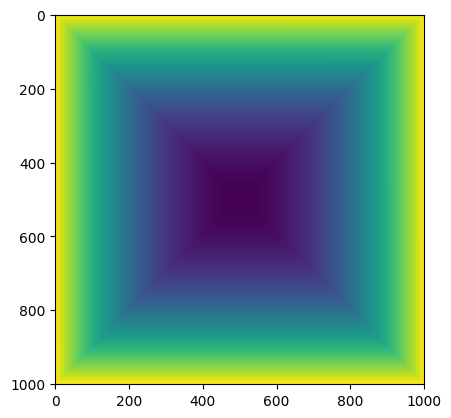

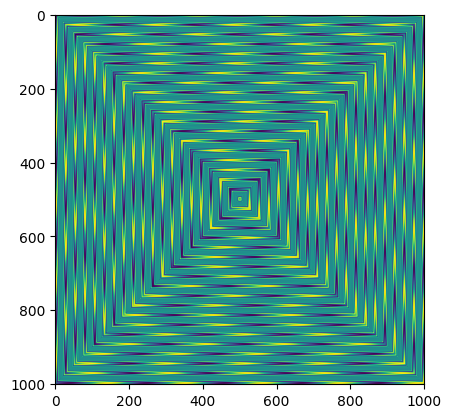

In [14]:
A = integer_spiral(1001)
plt.imshow(A)
# new figure
plt.figure()
plt.imshow(np.sin(A*0.03))

In [15]:
def integer_spiral_generator(n, gen):
    #accepts a generator function to make cooler spirals :)
    A = np.zeros((n+1, n+1))
    
    if n > 0:
        mid = n//2 + 1
        A[mid, mid] = next(gen)
        for i in range(1, mid):
            nums = ((2*i - 1)**2 + 1, (2*i - 1)**2 + 2*i, (2*i)**2 + 1)
            A[mid-i, mid+i-1:mid-i:-1] = [next(gen) for i in range(nums[1] - nums[0])]
            A[mid-i:mid+i:1, mid-i] = [next(gen) for i in range(nums[2] - nums[1])]
            if i*2 < n:
                nums = ((2*i)**2 + 1, (2*i)**2 + 2*i + 1, (2*i + 1)**2 + 1)
                A[mid+i, mid-i:mid+i:1] = [next(gen) for i in range(nums[1] - nums[0])]
                A[mid+i:mid-i-1:-1, mid+i] = [next(gen) for i in range(nums[2] - nums[1])]
    return A[1:, 1:]

def gen_nums():
    i = 0
    while True:
        i += 1
        yield i

def gen_fibonacci():
    #taken from 02_ukoly
    a = 0
    b = 1
    yield 1

    while True:
        c = a + b
        yield c
        a = b
        b = c

def gen_prime():
    #modified code from SKJ, which itself is modified code from VVP
    ret_primes = []
    cur = 1
    while True:
        cur += 1
        for i in ret_primes:
            if not cur % i:
                break
        else:
            ret_primes.append(cur)
            yield cur

def gen_zero_one():
    while True:
        yield 0
        yield 1

def gen_squares():
    i = 0
    while True:
        i += 1
        yield i**2

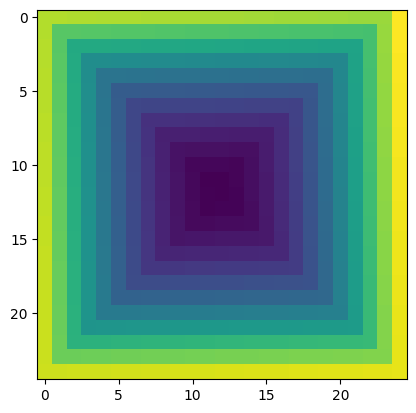

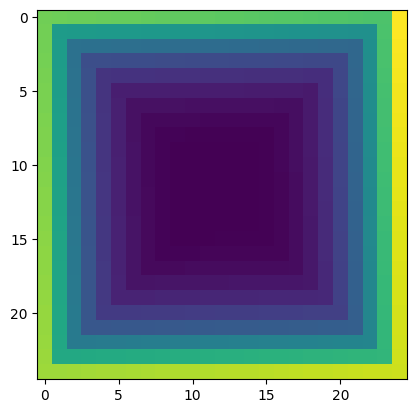

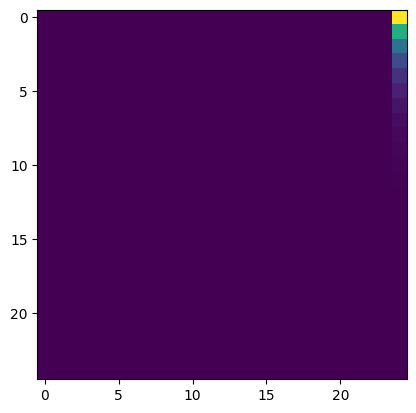

In [16]:
S1 = integer_spiral_generator(25, gen_nums()) #default
S5 = integer_spiral_generator(25, gen_squares()) #square numbers
S2 = integer_spiral_generator(25, gen_fibonacci()) #grows too fast, image really shows it
plt.imshow(S1)
plt.figure()
plt.imshow(S5)
plt.figure()
plt.imshow(S2)

Prvocislova spirala:
[[467. 463. 461. 457. 449. 443. 439. 433. 431. 421. 661.]
 [479. 269. 263. 257. 251. 241. 239. 233. 229. 419. 659.]
 [487. 271. 127. 113. 109. 107. 103. 101. 227. 409. 653.]
 [491. 277. 131.  41.  37.  31.  29.  97. 223. 401. 647.]
 [499. 281. 137.  43.   5.   3.  23.  89. 211. 397. 643.]
 [503. 283. 139.  47.   7.   2.  19.  83. 199. 389. 641.]
 [509. 293. 149.  53.  11.  13.  17.  79. 197. 383. 631.]
 [521. 307. 151.  59.  61.  67.  71.  73. 193. 379. 619.]
 [523. 311. 157. 163. 167. 173. 179. 181. 191. 373. 617.]
 [541. 313. 317. 331. 337. 347. 349. 353. 359. 367. 613.]
 [547. 557. 563. 569. 571. 577. 587. 593. 599. 601. 607.]]
Nula a jedna:
[[0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]]


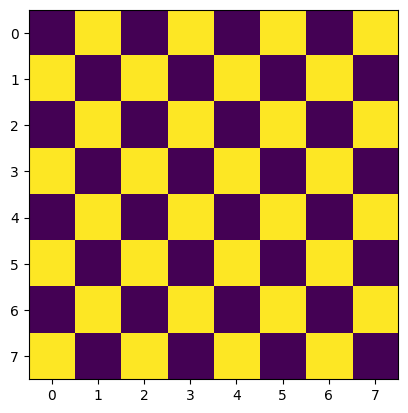

In [17]:
S3 = integer_spiral_generator(11, gen_prime()) #primes
S4 = integer_spiral_generator(8, gen_zero_one()) #another way to make a checkerboard :)
print(f"Prvocislova spirala:\n{S3}")
print(f"Nula a jedna:\n{S4}")
plt.imshow(S4)

In [18]:
def julia_set(x_min = -1.5, x_max = 1.5, y_min = -1.5, y_max = 1.5, n = 1000, k = 100, c = 0+0j):
    matrix_real, matrix_complex = np.meshgrid(np.linspace(x_min, x_max, n), np.linspace(y_max*1j, y_min*1j, n))
    Z = matrix_real + matrix_complex
    C = np.full(shape=(n,n), fill_value=c)
    div = np.full(shape=(n,n), fill_value=k, dtype=int)

    for i in range(k):
        Z = np.power(Z, 2) + C
        mask = np.abs(Z) > 2
        div[mask] = i
        Z[mask] = 0
        C[mask] = 0
    
    return div

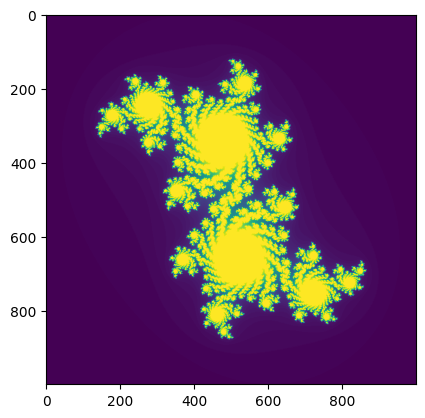

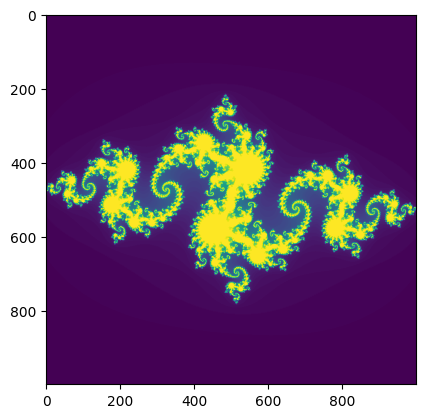

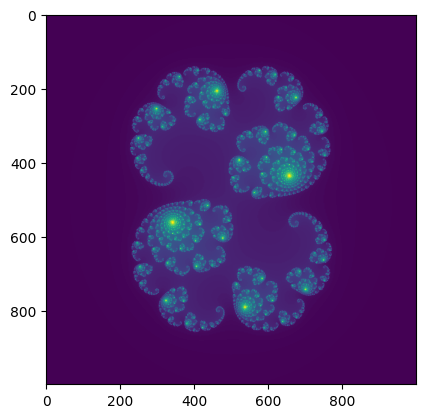

In [19]:
#some cool values from wikipedia :)
divergence_matrix = julia_set(c = .2+.55j)
plt.imshow(divergence_matrix)
divergence_matrix = julia_set(c = -.8+.156j)
plt.figure()
plt.imshow(divergence_matrix)
divergence_matrix = julia_set(c = .285+.01j, k = 200)
plt.figure()
plt.imshow(divergence_matrix)